# Importing Libraries and DF .

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/papers.csv')
df.columns

Index(['title', 'authors', 'year', 'venue', 'index', 'citations', 'abstract'], dtype='object')

In [ ]:
df.head(4)

,title,authors,year,venue,index,citations,abstract
0,Automated Deduction in Geometry: 5th Internati...,"Hoon Hong,Dongming Wang",2006,NaN,0,NaN,NaN
1,A+ Certification Core Hardware (Text & Lab Man...,Charles J. Brooks,2003,NaN,1,NaN,NaN
2,Performance engineering in industry: current p...,"Ahmed E. Hassan,Parminder Flora",2007,Proceedings of the 6th international workshop ...,2,NaN,This panel session discusses performance engin...
3,"Dude, You Can Do It! How to Build a Sweeet PC","Darrel Creacy,Carlito Vicencio",2005,NaN,3,NaN,Whether you're frustrated with current PC offe...


In [ ]:
unique_venues = df["venue"].unique()
for venue in unique_venues:
  # print(venue)




SyntaxError: incomplete input (<ipython-input-28-f0cd0d91475b>, line 5)

In [ ]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629814 entries, 0 to 629813
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      629814 non-null  object
 1   authors    603898 non-null  object
 2   year       629814 non-null  int64 
 3   venue      531220 non-null  object
 4   index      629814 non-null  int64 
 5   citations  125372 non-null  object
 6   abstract   281080 non-null  object
dtypes: int64(2), object(5)
memory usage: 33.6+ MB
None


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
title             0
authors       25916
year              0
venue         98594
index             0
citations    504442
abstract     348734
dtype: int64


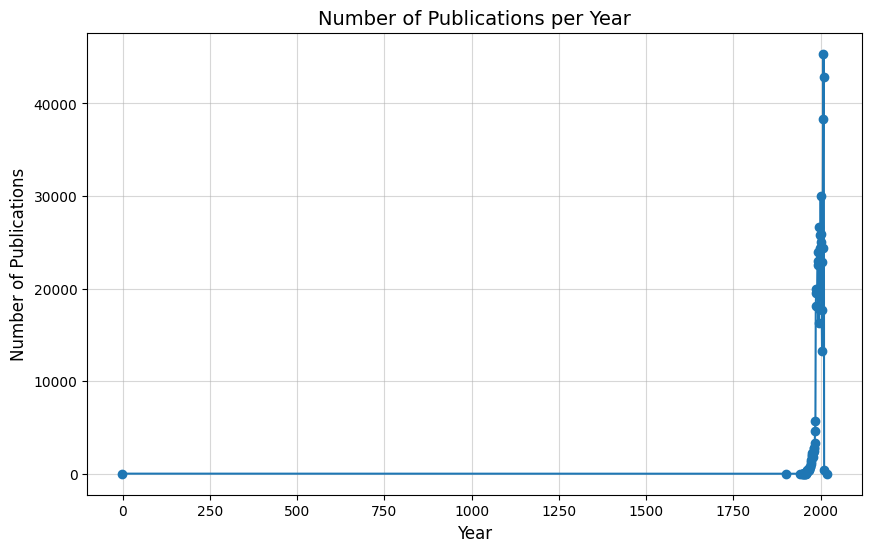

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your dataset is in a DataFrame called `df` with a 'year' column
yearly_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Number of Publications per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


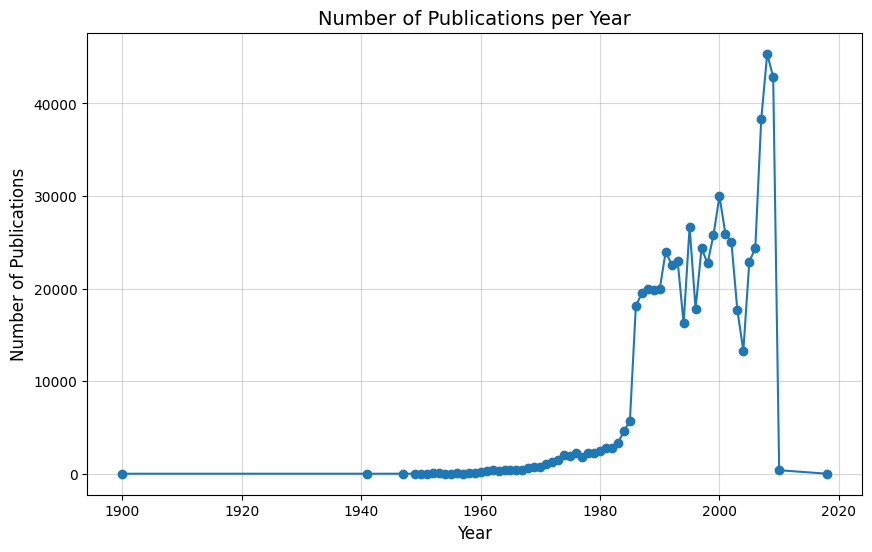

In [ ]:

df_cleaned = df[df['year'] > 1800]
yearly_counts = df_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Number of Publications per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
def aggregate_citations(citation):
    if isinstance(citation, list):
        return sum(citation)
    return citation

df['citations'] = df['citations'].apply(aggregate_citations)


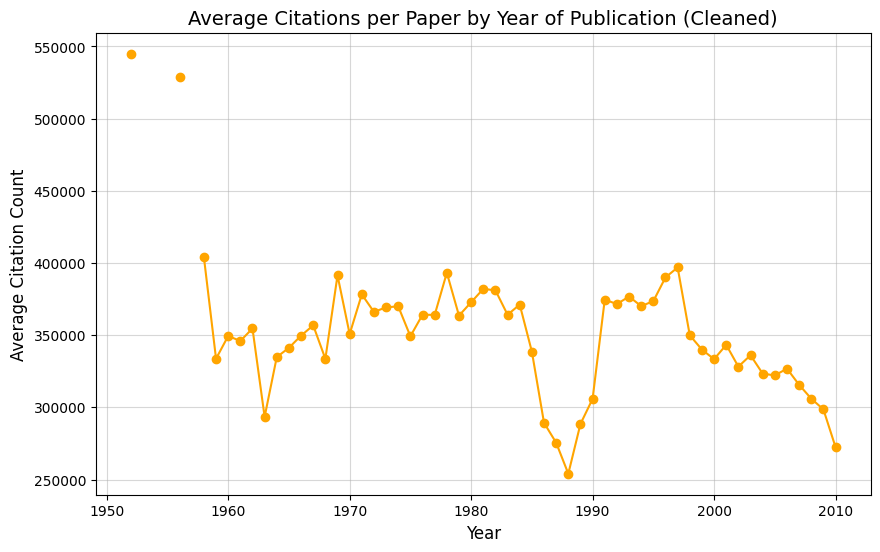

In [ ]:
# In cell ipython-input-12-a7b2e42ae9c2
# Convert the 'citations' column to numeric before calculating the mean
citation_trends_cleaned = df_cleaned.groupby('year')['citations'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())

plt.figure(figsize=(10, 6))
plt.plot(citation_trends_cleaned.index, citation_trends_cleaned.values, marker='o', color='orange')
plt.title('Average Citations per Paper by Year of Publication (Cleaned)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Citation Count', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
df['citations'] = df['citations'].apply(
    lambda x: list(map(int, x.split(';'))) if isinstance(x, str) and x else []
)

In [ ]:
df['citation_count'] = df['citations'].apply(len)


In [ ]:
import networkx as nx

# Initialize a directed graph
citation_graph = nx.DiGraph()

# Add nodes (papers)
for index, row in df.iterrows():
    citation_graph.add_node(
        row['index'],
        title=row['title'],
        authors=row['authors'],
        year=row['year'],
        venue=row['venue'],
        citation_count=row['citation_count']
    )

# Add edges (citations)
for index, row in df.iterrows():
    citing_paper = row['index']
    cited_papers = row['citations']
    for cited_paper in cited_papers:
        citation_graph.add_edge(citing_paper, cited_paper)

# Display basic graph information
print("\nGraph Information:")
print(f"Number of nodes (papers): {citation_graph.number_of_nodes()}")
print(f"Number of edges (citations): {citation_graph.number_of_edges()}")



Graph Information:
Number of nodes (papers): 629814
Number of edges (citations): 632751


In [ ]:
# In-degree (number of citations received)
in_degrees = citation_graph.in_degree()
print("\nTop 5 most cited papers:")
print(sorted(in_degrees, key=lambda x: x[1], reverse=True)[:5])

# Out-degree (number of references made)
out_degrees = citation_graph.out_degree()
print("\nTop 5 papers citing the most other papers:")
print(sorted(out_degrees, key=lambda x: x[1], reverse=True)[:5])



Top 5 most cited papers:
[(453387, 816), (162585, 791), (214951, 648), (151297, 588), (326368, 566)]

Top 5 papers citing the most other papers:
[(216749, 195), (513215, 182), (109762, 178), (304647, 155), (517478, 148)]


In [ ]:
density = nx.density(citation_graph)
print(f"\nGraph Density: {density}")



Graph Density: 1.5951771105713351e-06


In [ ]:
if nx.is_directed_acyclic_graph(citation_graph):
    print("\nThe graph is a Directed Acyclic Graph (DAG).")
else:
    print("\nThe graph contains cycles.")



The graph contains cycles.


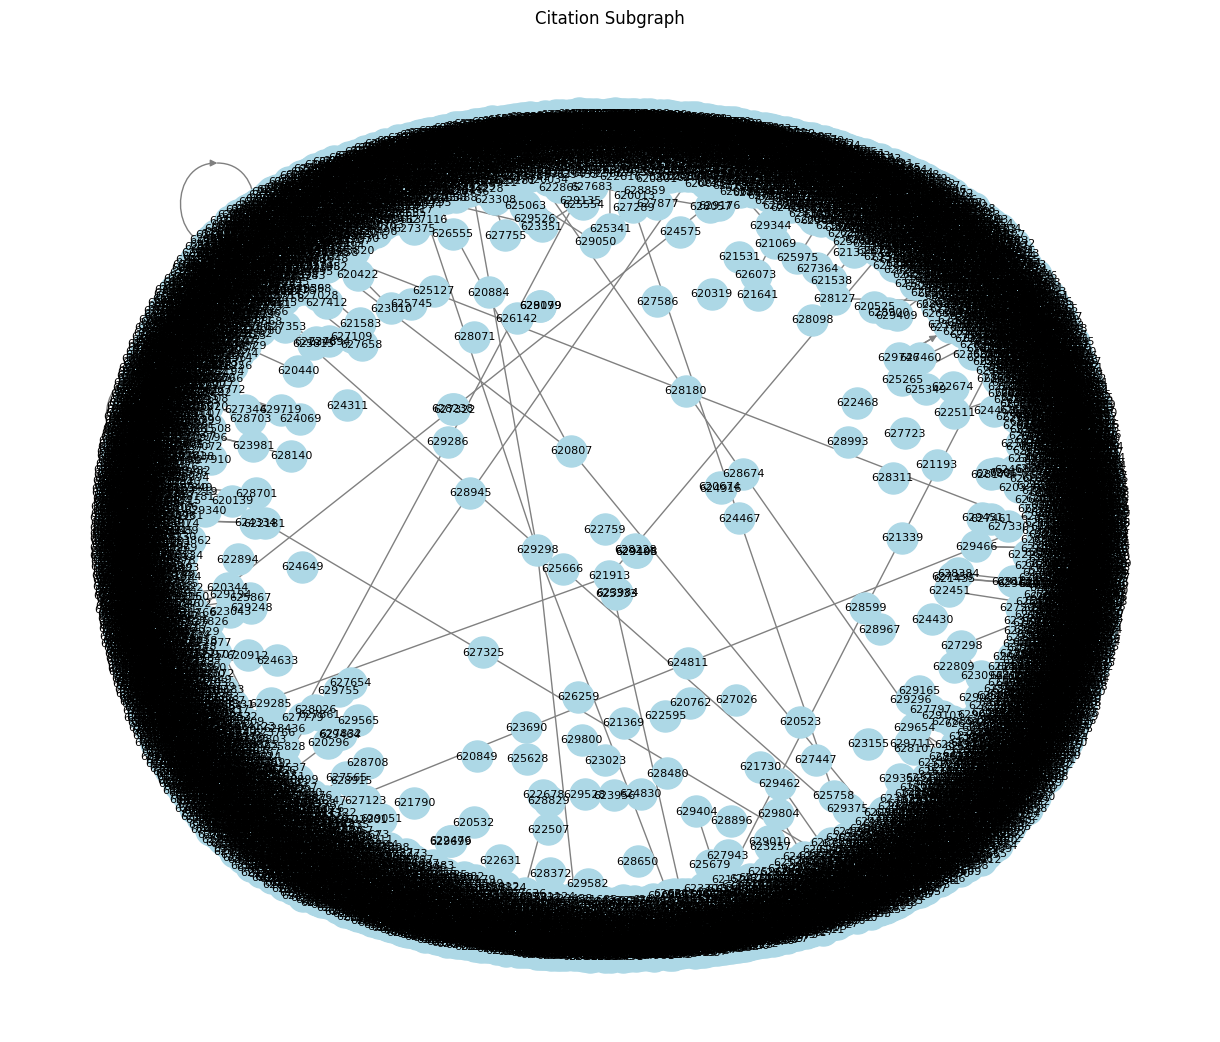

In [ ]:
import matplotlib.pyplot as plt

# Extract a subgraph (first 50 nodes for clarity)
subgraph = citation_graph.subgraph(list(citation_graph.nodes)[620000:629814])

# Generate positions using spring layout
pos = nx.spring_layout(subgraph)

# Plot the subgraph
plt.figure(figsize=(12, 10))
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_size=500,
    font_size=8,
    node_color="lightblue",
    edge_color="gray"
)
plt.title("Citation Subgraph")
plt.show()


PageRank:

Find the most influential papers using the PageRank algorithm:

In [ ]:
pagerank = nx.pagerank(citation_graph)
top_papers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 influential papers by PageRank:")
for paper_id, score in top_papers:
    print(f"Paper ID: {paper_id}, PageRank Score: {score}")



Top 5 influential papers by PageRank:
Paper ID: 453387, PageRank Score: 0.00022925577201438781
Paper ID: 246511, PageRank Score: 0.00021994846248653196
Paper ID: 586607, PageRank Score: 0.00021345592945164616
Paper ID: 81323, PageRank Score: 0.00020963496701718217
Paper ID: 79620, PageRank Score: 0.0002073839487361549


Betweenness Centrality:

Find papers that act as bridges in the citation graph:

In [ ]:
betweenness = nx.betweenness_centrality(citation_graph)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 influential papers by Betweenness Centrality:")
for paper_id, score in top_betweenness:
    print(f"Paper ID: {paper_id}, Betweenness Score: {score}")


Exception ignored in: <function _xla_gc_callback at 0x7cf3c87c7490>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7cf3c87c7490>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7cf3c87c7490>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities in the graph
communities = list(greedy_modularity_communities(citation_graph))
print(f"\nNumber of communities detected: {len(communities)}")

# Print the first 3 communities
for i, community in enumerate(communities[:3]):
    print(f"Community {i+1}: {list(community)[:10]} ...")  # Show first 10 nodes in each community


In [ ]:
# Calculate PageRank
pagerank = nx.pagerank(citation_graph)
df['pagerank'] = df['index'].map(pagerank)

# Calculate in-degree (citations received)
in_degree = dict(citation_graph.in_degree())
df['in_degree'] = df['index'].map(in_degree)

# Calculate out-degree (references made)
out_degree = dict(citation_graph.out_degree())
df['out_degree'] = df['index'].map(out_degree)

# Calculate clustering coefficient
clustering = nx.clustering(citation_graph.to_undirected())
df['clustering_coefficient'] = df['index'].map(clustering)


In [ ]:
df['abstract_length'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(df['abstract'].fillna(""))


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
df['abstract_embedding'] = df['abstract'].fillna("").apply(lambda x: model.encode(x))


In [ ]:
df['years_since_publication'] = 2024 - df['year']


In [ ]:
df['yearly_citation_rate'] = df['citation_count'] / df['years_since_publication'].replace(0, 1)


In [ ]:
venue_citation_avg = df.groupby('venue')['citation_count'].mean()
df['venue_avg_citations'] = df['venue'].map(venue_citation_avg)


In [ ]:
df['author_count'] = df['authors'].fillna("").apply(lambda x: len(x.split(',')) if x else 0)


In [ ]:
df['pagerank_citation_rate'] = df['pagerank'] * df['yearly_citation_rate']
df['abstract_length_influence'] = df['abstract_length'] * df['in_degree']


In [ ]:
# Select refined features
features = [
    'year', 'citation_count', 'abstract_length', 'years_since_publication',
    'pagerank', 'in_degree', 'out_degree', 'clustering_coefficient',
    'venue_avg_citations', 'author_count', 'yearly_citation_rate'
]

# Feature matrix
X = df[features]

# Target variable (future citations)
y = df['citation_count']  # Replace with actual target if available

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to abstracts
df['cleaned_abstract'] = df['abstract'].fillna('').apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')  # Adjust thresholds
dtm = vectorizer.fit_transform(df['cleaned_abstract'])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust `n_components` for the number of topics
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)


Topic 0:
network algorithm problem performance time paper result number protocol data
Topic 1:
method algorithm model result image paper problem using based data
Topic 2:
data web book database application query user use information computer
Topic 3:
technology information software computer research service development paper study project
Topic 4:
model paper approach language design user process based application program


Topic 0:
network algorithm problem performance time paper result number protocol data
Topic 1:
method algorithm model result image paper problem using based data
Topic 2:
data web book database application query user use information computer
Topic 3:
technology information software computer research service development paper study project
Topic 4:
model paper approach language design user process based application program

In [ ]:
# Get topic distributions for all documents
topic_distributions = lda.transform(dtm)

# Check the shape of the output
print(topic_distributions.shape)  # Should be (number of documents, number of topics)


(629814, 5)


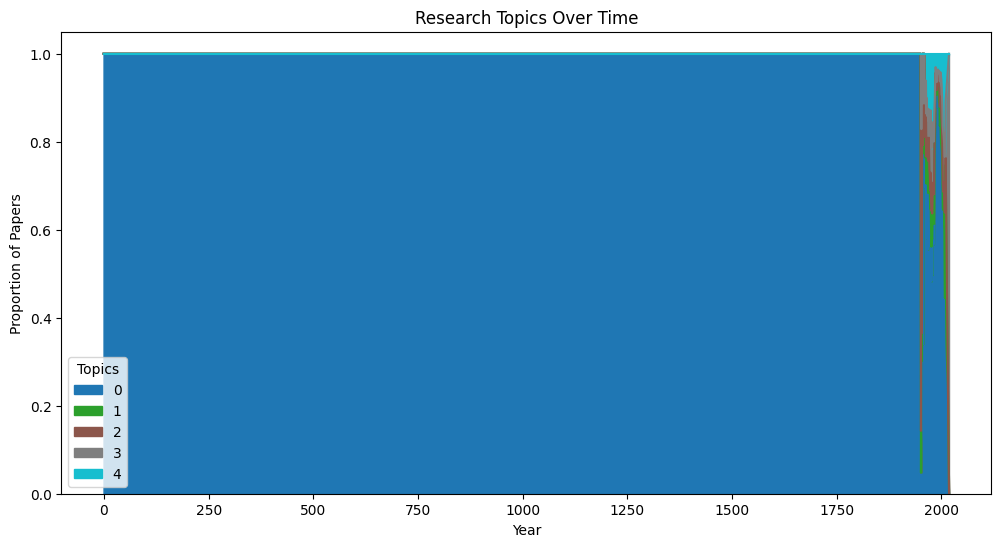

In [ ]:
# Assuming `topic_distributions` contains LDA topic proportions for each paper
df['dominant_topic'] = topic_distributions.argmax(axis=1)
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)

# Normalize by year total for proportions
topic_trends_normalized = topic_trends.div(topic_trends.sum(axis=1), axis=0)

# Plot
topic_trends_normalized.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Research Topics Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Papers')
plt.legend(title='Topics')
plt.show()


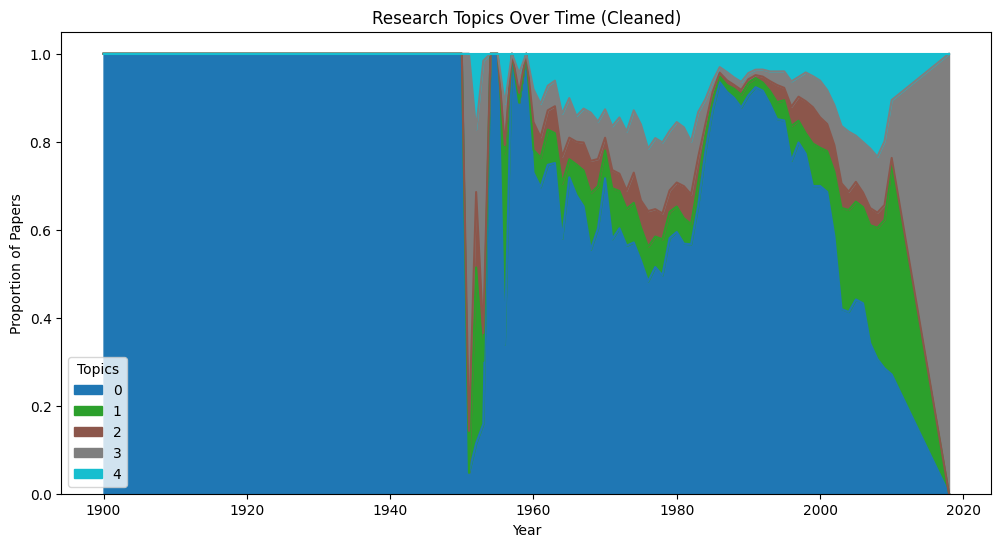

In [ ]:
# Filter out invalid years (e.g., year 0 or unrealistic values)
df = df[df['year'] > 0]

# Recalculate the trends after removing invalid years
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)

# Normalize topic trends to get proportions
topic_trends_normalized = topic_trends.div(topic_trends.sum(axis=1), axis=0)

# Re-plot the trends over time
topic_trends_normalized.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Research Topics Over Time (Cleaned)')
plt.xlabel('Year')
plt.ylabel('Proportion of Papers')
plt.legend(title='Topics')
plt.show()


The graph highlights the evolution of research themes over time. Topic 0 (Networking and Performance) dominated early research before the 1980s but declined as focus shifted to more complex, interdisciplinary areas. Topic 1 (Methods and Algorithms) gained prominence from the 1980s, peaking in the 2000s, driven by advancements in machine learning and computational methods. Topic 2 (Data and Databases) emerged strongly after the 1990s, reflecting the rapid rise of internet technologies and database systems. Topic 3 (Technology and Software) maintained a consistent presence, underscoring its foundational role in research and development. Finally, Topic 4 (Models and Applications) has shown rapid growth in recent decades, highlighting the increasing focus on practical applications, modeling techniques, and programming frameworks.

In [ ]:
# Transform citations into a list format
df['citations'] = df['citations'].apply(lambda x: [] if x == 0 else [x])


In [ ]:
print(df['citations'].apply(type).value_counts())

citations
<class 'list'>    629814
Name: count, dtype: int64


In [ ]:
# Ensure citations is always a flat list
df['citations'] = df['citations'].apply(lambda x: x if isinstance(x, list) else [x])
df['citations'] = df['citations'].apply(lambda x: [item for sublist in x for item in sublist] if any(isinstance(i, list) for i in x) else x)


In [ ]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes (papers)
G.add_nodes_from(df.index)

# Add edges (citations)
for paper_id, row in df.iterrows():
    for cited_paper in row['citations']:
        G.add_edge(paper_id, cited_paper)


In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 747000
Number of edges: 629814


In [ ]:
# Add missing nodes
for paper_id, row in df.iterrows():
    for cited_paper in row['citations']:      # 2 diff sep graphs train test (no connections) remove the connections
        if cited_paper not in G:
            G.add_node(cited_paper)


In [ ]:
# Positive samples
positive_samples = [(u, v) for u, v in G.edges()]


In [ ]:
"""import random

# Number of negative samples to generate (equal to positive samples)
num_negative_samples = len(positive_samples)

negative_samples = set()
while len(negative_samples) < num_negative_samples:
    u = random.choice(list(G.nodes()))
    v = random.choice(list(G.nodes()))
    if u != v and not G.has_edge(u, v):  # Check if edge doesn't already exist
        negative_samples.add((u, v))  # Add to the set

negative_samples = list(negative_samples) # Convert back to list if needed"""

In [ ]:
import numpy as np
import random
import networkx as nx # This line was missing, and now imports networkx with the alias 'nx'


#!!!!!!!

def fast_negative_sampling(G, positive_samples, num_negative_samples):
    """Generates negative samples efficiently without creating a massive array."""
    nodes = list(G.nodes())
    negative_samples = set()

    while len(negative_samples) < num_negative_samples:
        u = random.choice(nodes)
        v = random.choice(nodes)
        if u != v and not G.has_edge(u, v):
            negative_samples.add((u, v))

    return list(negative_samples)

# Call the function to generate negative samples:
negative_samples = fast_negative_sampling(G, positive_samples, len(positive_samples))

In [ ]:
# Combine positive and negative samples
samples = positive_samples + negative_samples
labels = [1] * len(positive_samples) + [0] * len(negative_samples)


In [ ]:
"""from networkx.algorithms.link_prediction import adamic_adar_index
import pandas as pd

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Compute Adamic-Adar index and store directly in a DataFrame
aa_scores = pd.DataFrame(
    [(u, v, score) for u, v, score in adamic_adar_index(G_undirected, samples)],
    columns=['paper_A', 'paper_B', 'adamic_adar_score']
)

# Compute common neighbors using set operations
def compute_common_neighbors(row):
    return len(set(G.neighbors(row['paper_A'])).intersection(G.neighbors(row['paper_B'])))

# Add common neighbors and labels directly
feature_df = pd.DataFrame(samples, columns=['paper_A', 'paper_B'])
feature_df['adamic_adar_score'] = aa_scores['adamic_adar_score']
feature_df['common_neighbors'] = feature_df.apply(compute_common_neighbors, axis=1)
feature_df['label'] = labels
"""

In [ ]:
feature_df = pd.read_csv('feature_df.csv')

<ipython-input-3-6ccbcb76c235>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_df = pd.read_csv('feature_df.csv')


In [ ]:
# Replace NaN values with an empty string
df['abstract'] = df['abstract'].fillna("")
# Convert all abstracts to strings
df['abstract'] = df['abstract'].astype(str)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize abstracts
tfidf = TfidfVectorizer()
abstract_embeddings = tfidf.fit_transform(df['abstract'])

# Compute similarity for each pair
def compute_similarity(row):
    try:
        # Use .get_loc to safely get the index, handling KeyError if not found
        index_A = df.index.get_loc(row['paper_A'])
        index_B = df.index.get_loc(row['paper_B'])

        return cosine_similarity(
            abstract_embeddings[index_A],
            abstract_embeddings[index_B]
        )[0, 0]
    except KeyError:
        # Handle case where paper ID is not found in df.index
        return 0  # Or another appropriate default value

feature_df['abstract_similarity'] = feature_df.apply(compute_similarity, axis=1)

NameError: name 'df' is not defined

In [ ]:
# Convert the 'paper_A' and 'paper_B' columns to numeric
feature_df['paper_A'] = pd.to_numeric(feature_df['paper_A'], errors='coerce')
feature_df['paper_B'] = pd.to_numeric(feature_df['paper_B'], errors='coerce')

# Drop rows with NaN values after conversion (if any)
feature_df = feature_df.dropna()

# Split data after converting to numeric
X = feature_df.drop(columns=['label'])
y = feature_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94597
           1       1.00      1.00      1.00      4958

    accuracy                           1.00     99555
   macro avg       1.00      1.00      1.00     99555
weighted avg       1.00      1.00      1.00     99555

AUC-ROC: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC-ROC:", scores.mean())


Cross-validated AUC-ROC: 0.9230094299325661
